<a href="https://colab.research.google.com/github/jordanbell2357/Keras/blob/main/FordA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

> The Ford Classification Challenge [1] consists of two data sets that include data samples from an automotive subsystem. The data was collected in batches of N = 500 samples per diagnostic session, splitted in a training, a validation and a test set. The size of training, validation and test set is listed in Table I. The training set provided also the classification labels, wherein +1 indicates that a specific symptom exists and -1 indicates that the symptom does not exist. Later during the competition, the validation labels were also published on the competition website [1].

In [2]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

In [3]:
print(x_train.shape, y_train.shape)
print(x_train[0,0:10])
print(y_train[0:10])

(3601, 500) (3601,)
[-0.79717168 -0.66439208 -0.37301463  0.04081512  0.52693599  0.98428794
  1.3531202   1.5781078   1.6592509   1.6408093 ]
[-1  1 -1 -1 -1  1  1  1  1  1]


In [4]:
print(x_train.shape, x_test.shape)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
print(x_train.shape, x_test.shape)

(3601, 500) (1320, 500)
(3601, 500, 1) (1320, 500, 1)


In [5]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [6]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [7]:
num_classes = len(np.unique(y_train))

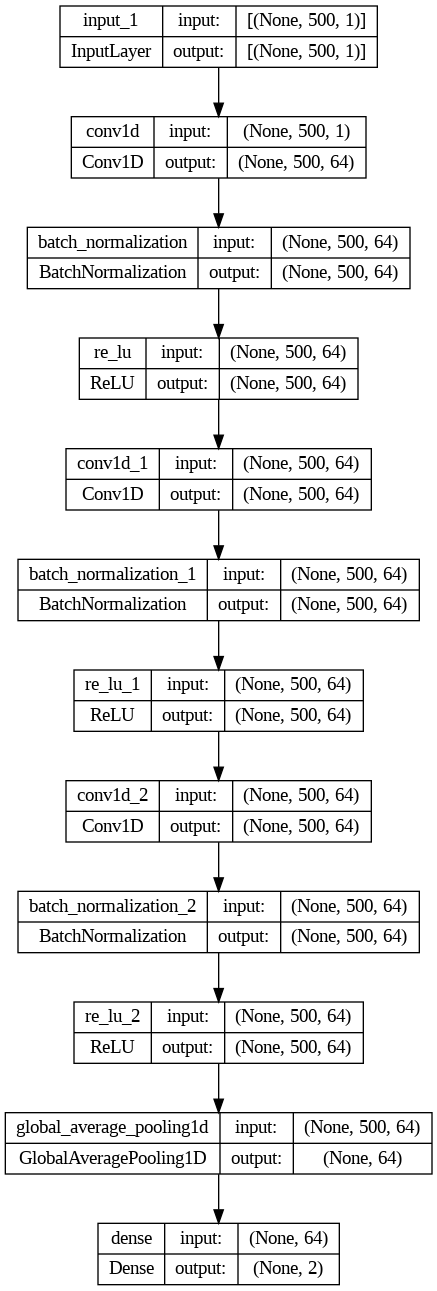

In [8]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

In [11]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

42/42 [==============================] - 0s 6ms/step - loss: 0.0900 - sparse_categorical_accuracy: 0.9697
Test accuracy 0.9696969985961914
Test loss 0.09002748876810074


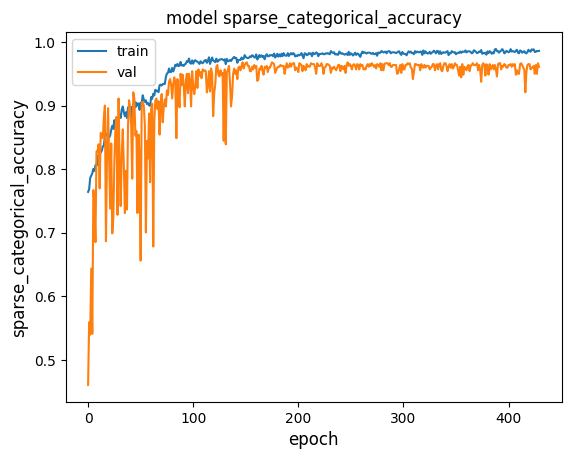

In [12]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [13]:
model.save("trained_FordA_model.keras")

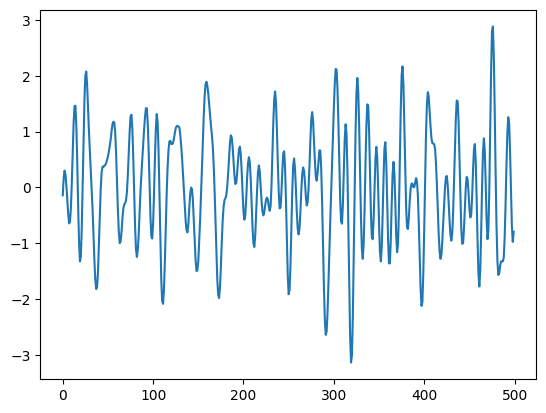

In [14]:
plt.plot(x_test[0])

In [17]:
# Reshape the sequence to have a batch dimension of size 1
sequence = x_test[0].reshape(1, -1, 1)

# Get model prediction
prediction = model.predict(sequence)

# Extract class prediction
predicted_class = np.argmax(prediction, axis=1)[0]

print(predicted_class)
print(y_test[0])

1/1 [==============================] - 0s 124ms/step
0
0


In [ ]:
# Initialize counters
correct_predictions = 0
incorrect_predictions = 0

# Loop over the test set
for i in range(len(x_test)):
    # Reshape the sequence to have a batch dimension of size 1
    sequence = x_test[i].reshape(1, -1, 1)

    # Get model prediction
    prediction = model.predict(sequence)

    # Extract class prediction
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Check if prediction is correct and update counters
    if predicted_class == y_test[i]:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

In [19]:
print(f"Number of correct predictions: {correct_predictions}")
print(f"Number of incorrect predictions: {incorrect_predictions}")

Number of correct predictions: 1280
Number of incorrect predictions: 40


In [22]:
print(f"Test accuracy: {1 - 40/(1280+40)}")

Test accuracy: 0.9696969696969697
